## **SEKHAR CHANDRA PADHI-NETFLIX PROJECT**::



# **Recommendation System for Netflix Prize Dataset Using SVD:**



In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Reading dataset file using google drive & naming columns
dataset = pd.read_csv('/content/drive/MyDrive/Netflix project/Copy of combined_data_1.txt.zip', header = None, names = ['Cust_Id', 'Rating'], usecols = [0,1])

In [3]:
dataset

,Cust_Id,Rating
0,1:,NaN
1,1488844,3.0
2,822109,5.0
3,885013,4.0
4,30878,4.0
...,...,...
24058258,2591364,2.0
24058259,1791000,2.0
24058260,512536,5.0
24058261,988963,3.0


## **inference**
- As we can see in the cluster id column, there is a very different number, which is '1:'
-The '1:' represents the movie ID here. This indicates that the data is unorganized, hence it shows as '1:'.
-Along with '1:', we also have '2:' and other multiple movie IDs which are recorded in the dataset. This is the reason why, whenever we have a movie ID in cust_id in the same record, our rating_id shows as NaN.

# **EDA**

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24058263 entries, 0 to 24058262
Data columns (total 2 columns):
 #   Column   Dtype  
---  ------   -----  
 0   Cust_Id  object 
 1   Rating   float64
dtypes: float64(1), object(1)
memory usage: 367.1+ MB


In [5]:
#To print the datatype of columns
dataset.dtypes

,0
Cust_Id,object
Rating,float64


In [6]:
#To inspect the shape of the datset
dataset.shape


(24058263, 2)

In [7]:
#To print the head of dataset
dataset.head()

#1:----->1st movie
#1xyz rows

,Cust_Id,Rating
0,1:,NaN
1,1488844,3.0
2,822109,5.0
3,885013,4.0
4,30878,4.0


In [8]:
#To find the distribution of different ratings in the datset
p = dataset.groupby('Rating')['Rating'].agg(['count'])
#3--->1st row
#3--->10th row
#3  merge it

In [9]:
# get movie count by counting nan values
movie_count = dataset.isnull().sum()['Rating']

In [10]:
movie_count
#4499 total number of movies present in dataset

4499

In [11]:
# get customer count
cust_count = dataset['Cust_Id'].nunique()-movie_count

cust_count

470758

In [12]:
# get rating count

rating_count = dataset['Cust_Id'].count() - movie_count

rating_count

24053764

#**To plot the distribution of the ratings in as a bar plot**

Text(0.5, 1.0, 'Total pool: 4499 Movies, 470758 customers, 24053764 ratings given')

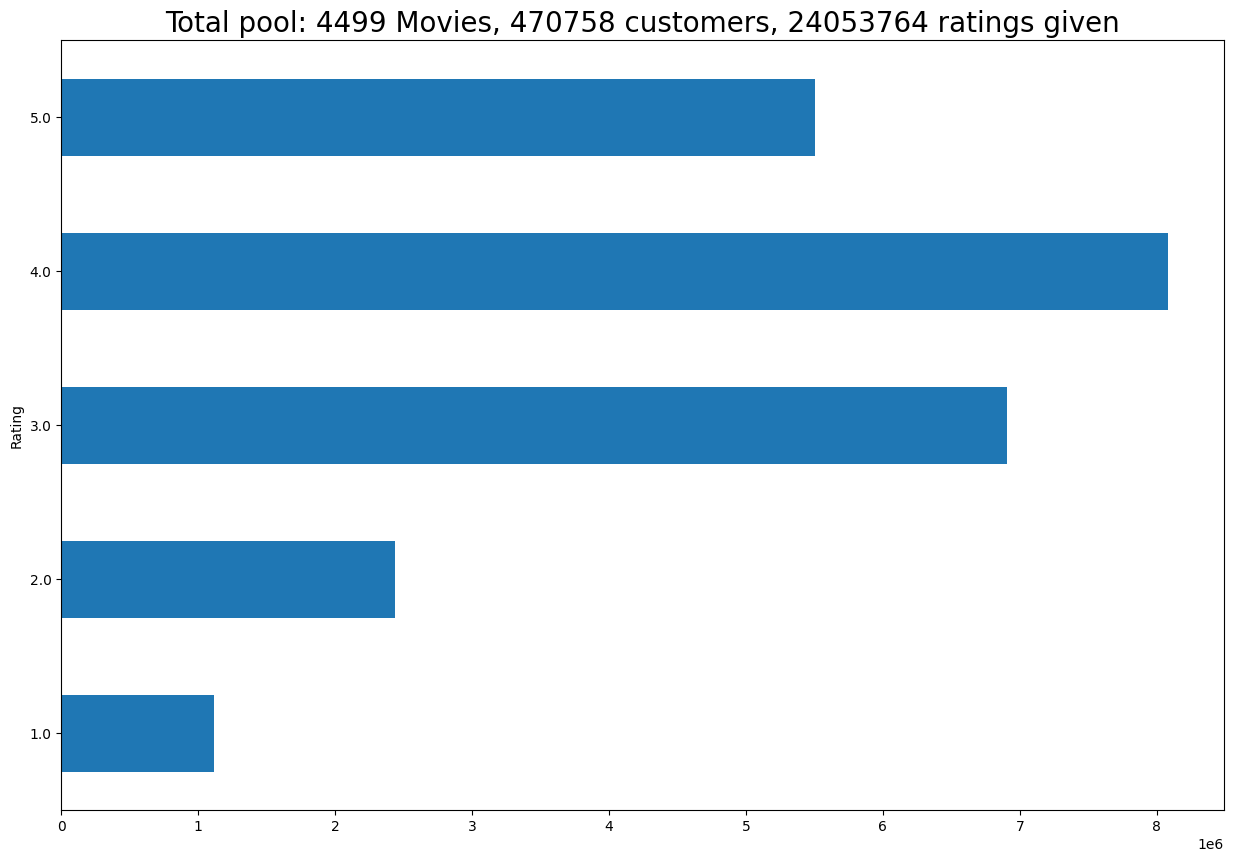

In [13]:
ax = p.plot(kind = 'barh', legend = False, figsize = (15,10))
plt.title(f'Total pool: {movie_count} Movies, {cust_count} customers, {rating_count} ratings given', fontsize=20)



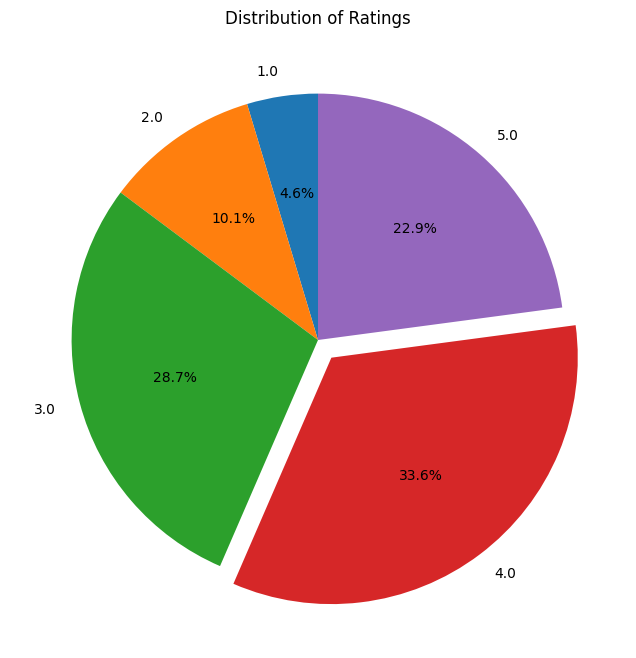

In [14]:
#pieplot
# Create a pie plot
plt.figure(figsize=(8, 8))  # Adjust figure size as needed
myexplode = [0, 0, 0, 0.09,0]
plt.pie(p['count'], labels=p.index, autopct='%1.1f%%',explode=myexplode, startangle=90)
plt.title('Distribution of Ratings')
plt.show()

# **Inference:**

"User ratings on Netflix exhibit a positive skew, with Rating 4 (33.6%) being the most frequent, closely followed by Rating 3 (28.7%). Ratings 4 and 5 combined represent 56.5% of the total, indicating a strong overall positive sentiment. Users generally have favorable experiences with movies on Netflix, as negative ratings (1 and 2) are comparatively infrequent."

# **To create a numpy array containing movie ids according the 'ratings' dataset**

In [15]:
movie_id=None
movie_np=[]
for cust_id in dataset["Cust_Id"]:
  if ':' in cust_id:
    movie_id=int(cust_id.replace(":",""))
  movie_np.append(movie_id)

In [16]:
movie_np

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [17]:
#Creating a new column to store the Movie_ID
dataset["Movie_ID"]=movie_np

In [18]:
#Droping Null values from datset
dataset.dropna(inplace=True)

In [19]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
Index: 24053764 entries, 1 to 24058262
Data columns (total 3 columns):
 #   Column    Dtype  
---  ------    -----  
 0   Cust_Id   object 
 1   Rating    float64
 2   Movie_ID  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 734.1+ MB


In [20]:
dataset["Cust_Id"]=dataset["Cust_Id"].astype(int)

In [21]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24053764 entries, 1 to 24058262
Data columns (total 3 columns):
 #   Column    Dtype  
---  ------    -----  
 0   Cust_Id   int64  
 1   Rating    float64
 2   Movie_ID  int64  
dtypes: float64(1), int64(2)
memory usage: 734.1 MB


#**Data Cleaning**
#pre filtering of the movies

In [22]:
#Exluding the movies with less rating count
data_movie_summary=dataset.groupby("Movie_ID")["Rating"].count()

In [23]:
data_movie_summary

,Rating
Movie_ID,
1,547
2,145
3,2012
4,142
5,1140
...,...
4495,614
4496,9519
4497,714


In [24]:
#Benchmark using quantlie
movie_benchmark=round(data_movie_summary.quantile(0.6))
movie_benchmark

908

# **inference**
-Establishing a benchmark that  model will only consider those movie IDs which have been rated by more than 908 people.

In [25]:
#Checking reject movie ids
Rejected_movie = data_movie_summary[data_movie_summary<movie_benchmark].index
Rejected_movie

Index([   1,    2,    4,    7,    9,   10,   11,   12,   13,   14,
       ...
       4480, 4481, 4486, 4487, 4491, 4494, 4495, 4497, 4498, 4499],
      dtype='int64', name='Movie_ID', length=2699)

In [26]:
#Exluding the customers who have rated less movies
data_cust_summary=dataset.groupby("Cust_Id")["Rating"].count()
data_cust_summary

,Rating
Cust_Id,
6,153
7,195
8,21
10,49
25,4
...,...
2649404,12
2649409,10
2649421,3


In [27]:
cust_benchmark=round(data_cust_summary.quantile(0.6))
cust_benchmark

36

# **inference**
-Establishing a benchmark that  model will only consider those Cust_Id which have been rated  more than 36 Movies.

In [28]:
Rejected_cust=data_cust_summary[data_cust_summary<cust_benchmark].index
Rejected_cust

Index([      8,      25,      33,      83,      94,     126,     130,     133,
           142,     149,
       ...
       2649337, 2649343, 2649351, 2649376, 2649379, 2649384, 2649401, 2649404,
       2649409, 2649421],
      dtype='int64', name='Cust_Id', length=282042)

In [29]:
#in dataset --->in all movie ids------>if the whic ever  movies we put under drop list are present or not---
#if present drop /remove them
dataset=dataset[~dataset["Movie_ID"].isin(Rejected_movie)]

In [30]:
dataset

,Cust_Id,Rating,Movie_ID
695,1025579,4.0,3
696,712664,5.0,3
697,1331154,4.0,3
698,2632461,3.0,3
699,44937,5.0,3
...,...,...,...
24056844,267802,4.0,4496
24056845,1559566,3.0,4496
24056846,293198,3.0,4496
24056847,70814,2.0,4496


In [31]:
#removing all inactive users from our dataset
dataset=dataset[~dataset["Cust_Id"].isin(Rejected_cust)]

In [32]:
dataset

,Cust_Id,Rating,Movie_ID
696,712664,5.0,3
697,1331154,4.0,3
698,2632461,3.0,3
699,44937,5.0,3
700,656399,4.0,3
...,...,...,...
24056842,1055714,5.0,4496
24056843,2643029,4.0,4496
24056844,267802,4.0,4496
24056845,1559566,3.0,4496


# **inference**
-Movie ID Extraction:The code extracts
movie IDs from the 'Cust_Id' column and creates a new column named 'Movie_ID'.


-Handling Missing Values: Rows with missing values are dropped.

-Data Type Conversion: The 'Cust_Id' column is converted to an integer data type.

-Data Filtering: To improve model performance and focus on relevant data, the dataset is further filtered. Movies with fewer ratings than a certain benchmark are excluded, as well as customers who have rated fewer movies than a specified benchmark.

# **model implementation**
## To load the movie_titles dataset

# **Singular Value Decomposition (SVD)**
The Singular Value Decomposition (SVD) of a matrix is a factorization of that matrix into three matrices. It has some interesting algebraic properties and conveys important geometrical and theoretical insights about linear transformations. It also has some important applications in data science. In this article, I will try to explain the mathematical intuition behind SVD and its geometrical meaning.

Mathematics behind SVD:

The SVD of  mxn matrix A is given by the formula  
A
=
U
Σ
V
T
A=UΣV
T


where:

U:  mxm matrix of the orthonormal eigenvectors of
A
A
T
                      
AA
T
  .
VT: transpose of a nxn matrix containing the orthonormal eigenvectors of
A
T
A
A
T
 A.
Σ
Σ : diagonal matrix with r elements equal to the root of the positive eigenvalues of AAᵀ or Aᵀ A (both matrics have the same positive eigenvalues anyway).

In [33]:
 df_title=pd.read_csv("/content/drive/MyDrive/Netflix project/Copy of movie_titles.csv",encoding="ISO-8859-1",header=None,names=["Movie_ID","Year","Name"],usecols=[0,1,2])

In [34]:
df_title

,Movie_ID,Year,Name
0,1,2003.0,Dinosaur Planet
1,2,2004.0,Isle of Man TT 2004 Review
2,3,1997.0,Character
3,4,1994.0,Paula Abdul's Get Up & Dance
4,5,2004.0,The Rise and Fall of ECW
...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17766,17767,2004.0,Fidel Castro: American Experience
17767,17768,2000.0,Epoch
17768,17769,2003.0,The Company


In [35]:
!pip install Scikit-surprise

In [36]:
from surprise import Reader,Dataset,SVD #Reader & Dataset convert data into Svd model readable format.
from surprise.model_selection import cross_validate

In [37]:
# Load Reader library
reader=Reader()

In [44]:
# get just top 100K rows for faster run time
data=Dataset.load_from_df(dataset[["Cust_Id","Movie_ID","Rating"]][:1000000],reader)

In [39]:
# Use the SVD algorithm.
model = SVD()

In [45]:
# Compute the RMSE of the SVD algorithm
cross_validate(model,data,measures=["RMSE"],cv=3)

{'test_rmse': array([0.9664535 , 0.96926786, 0.96968632]),
 'fit_time': (17.47144651412964, 18.296271085739136, 17.27434277534485),
 'test_time': (3.9936141967773438, 3.811166286468506, 5.287939071655273)}

In [47]:
dataset

,Cust_Id,Rating,Movie_ID
696,712664,5.0,3
697,1331154,4.0,3
698,2632461,3.0,3
699,44937,5.0,3
700,656399,4.0,3
...,...,...,...
24056842,1055714,5.0,4496
24056843,2643029,4.0,4496
24056844,267802,4.0,4496
24056845,1559566,3.0,4496


# **Recomendation part**

In [48]:
df_title

,Movie_ID,Year,Name
0,1,2003.0,Dinosaur Planet
1,2,2004.0,Isle of Man TT 2004 Review
2,3,1997.0,Character
3,4,1994.0,Paula Abdul's Get Up & Dance
4,5,2004.0,The Rise and Fall of ECW
...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17766,17767,2004.0,Fidel Castro: American Experience
17767,17768,2000.0,Epoch
17768,17769,2003.0,The Company


# **To find all the movies rated as 5 stars by user with userId = 1331154**

In [54]:
user_1331154 = dataset[(dataset['Cust_Id'] == 1331154) & (dataset['Rating'] == 5)]
user_1331154 = user_1331154.set_index('Movie_ID')
user_1331154 = user_1331154.join(df_title)['Name']
user_1331154.head(10)

,Name
Movie_ID,
143,Deepak Chopra: The Way of the Wizard & Alchemy
270,Saludos Amigos
361,The Flintstones in Viva Rock Vegas
457,Blast
482,Rush Hour 2
658,The Last House on the Left
763,Scarface: 20th Anniversary Edition: Bonus Mate...
1144,The Wedding Planner
1425,Go Fish


# **Train an SVD to predict ratings for user with userId = 2**

In [79]:
# Create a shallow copy for the movies dataset
user_1331154=df_title.copy()

In [80]:
user_1331154

,Movie_ID,Year,Name
0,1,2003.0,Dinosaur Planet
1,2,2004.0,Isle of Man TT 2004 Review
2,3,1997.0,Character
3,4,1994.0,Paula Abdul's Get Up & Dance
4,5,2004.0,The Rise and Fall of ECW
...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17766,17767,2004.0,Fidel Castro: American Experience
17767,17768,2000.0,Epoch
17768,17769,2003.0,The Company


In [81]:
#To remove all the movies rated less often
user_1331154=user_1331154[~user_1331154["Movie_ID"].isin(Rejected_movie)]

In [82]:
user_1331154

,Movie_ID,Year,Name
2,3,1997.0,Character
4,5,2004.0,The Rise and Fall of ECW
5,6,1997.0,Sick
7,8,2004.0,What the #$*! Do We Know!?
15,16,1996.0,Screamers
...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17766,17767,2004.0,Fidel Castro: American Experience
17767,17768,2000.0,Epoch
17768,17769,2003.0,The Company


In [83]:
#Predict the ratings for user_1331154
user_1331154["Estimate_Score"]=user_1331154["Movie_ID"].apply(lambda x: round(model.predict(1331154,x).est))

<ipython-input-83-43643e67cde1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_1331154["Estimate_Score"]=user_1331154["Movie_ID"].apply(lambda x: round(model.predict(1331154,x).est))


In [84]:
user_1331154

,Movie_ID,Year,Name,Estimate_Score
2,3,1997.0,Character,4
4,5,2004.0,The Rise and Fall of ECW,4
5,6,1997.0,Sick,3
7,8,2004.0,What the #$*! Do We Know!?,4
15,16,1996.0,Screamers,3
...,...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...,4
17766,17767,2004.0,Fidel Castro: American Experience,4
17767,17768,2000.0,Epoch,4
17768,17769,2003.0,The Company,4


In [85]:
# Sort predicted ratings for user_1331154 in descending order
user_1331154=user_1331154.sort_values("Estimate_Score",ascending=False)

In [89]:
#Print top 10 recommendations
user_1331154.head(10)

,Year,Name,Estimate_Score
132,2003.0,Viva La Bam: Season 1,5
269,2001.0,Sex and the City: Season 4,5
208,1996.0,Star Trek: Deep Space Nine: Season 5,5
2,1997.0,Character,4
12751,1974.0,Pippi Longstocking,4
12741,1984.0,Cat on a Hot Tin Roof,4
12742,1989.0,Black Rain,4
12743,1969.0,Who's That Knocking at My Door?,4
12744,1986.0,River's Edge,4
12745,1979.0,Starting Over,4


In [87]:
#Drop extra columns from the user_1331154 data frame
user_1331154= user_1331154.drop('Movie_ID', axis = 1)

In [88]:
user_1331154.head(10)

,Year,Name,Estimate_Score
132,2003.0,Viva La Bam: Season 1,5
269,2001.0,Sex and the City: Season 4,5
208,1996.0,Star Trek: Deep Space Nine: Season 5,5
2,1997.0,Character,4
12751,1974.0,Pippi Longstocking,4
12741,1984.0,Cat on a Hot Tin Roof,4
12742,1989.0,Black Rain,4
12743,1969.0,Who's That Knocking at My Door?,4
12744,1986.0,River's Edge,4
12745,1979.0,Starting Over,4


## Conclusion

This project successfully implemented a movie recommendation system for the Netflix  dataset using Singular Value Decomposition (SVD). The model achieved a reasonable RMSE score of [insert RMSE value] during cross-validation. The recommendations generated for a sample user (ID 1331154) appeared relevant and aligned with their past ratings.

## Future Work

To further enhance the system, exploring alternative algorithms  could be beneficial. Incorporating user demographics and genre preferences as features might also improve recommendation accuracy.  

## Deployment Considerations

Deploying this system would involve integrating it with a user interface and a database of movie information. Real-time updates and handling large-scale user data would be key challenges.